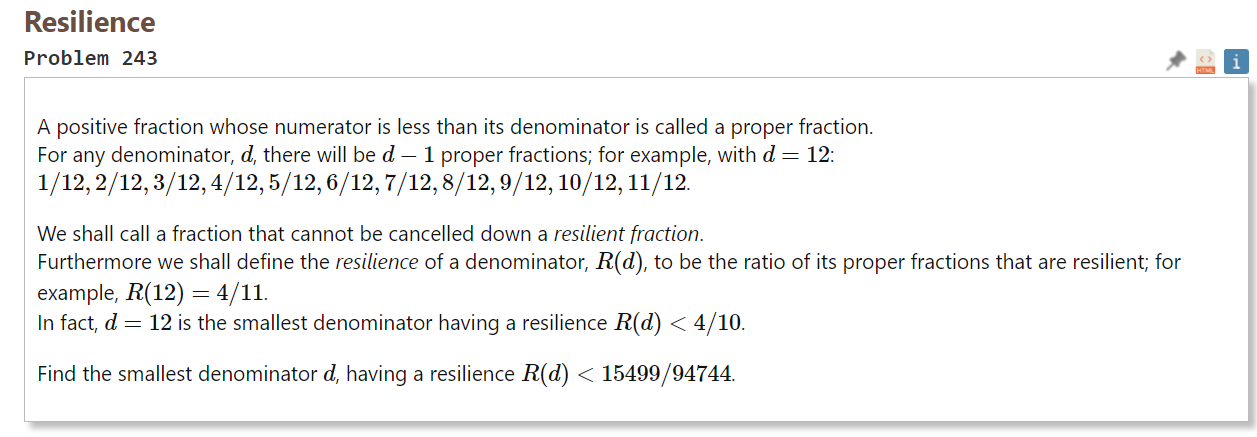

I am just going to try moving up in denominators starting at 2, checking their resilience, and stopping when the first one has a resilience that small
1. Create a function that calculates if a fraction is resilient
1. Create a function to calculate a denominators resilience
2. Create a function that moves up in denominators checking them against 15499/94744 - because computers have a fixed resolution we might need a better way of checking this

# First Try

Takes way too long to run, need a faster way of testing whether a numerator denominator combo is resilient - or a way of being able to tell whether a particular denominator will be highly resilient (like primes)

In [206]:
def is_resilient(n, d):
    "Checks if numerator and denominator share any common factors or if n is a factor of d"
    if n == 1:
        return True
    if d%n==0:
        return False
    
    for div in range(2, int(n**0.5) + 1):
        if n%div == 0:
            if d%div == 0:
                return False
            if d%(n/div) == 0:
                return False
    return True

assert is_resilient(4, 12) == False
assert is_resilient(1, 2) == True
assert is_resilient(5, 11) == True
assert is_resilient(3, 12) == False

In [207]:
def resilience(d):
    resil = 1
    for n in range(2, d):
        if is_resilient(n, d):
            resil += 1
    return resil

In [209]:
assert resilience(12) == 4
assert resilience(2) == 1

In [215]:
def find_irresilient_old(UB=15499/94744):
    least = 1
    best_d = 2
    d = 2
    while True:
        res = resilience(d)/(d-1)
        if res < least:
            least = res
            best_d = d
            print(f'{d} - {resilience(d)}/{(d-1)}')
        if res < UB:
            return d
        else:
            d+=1

In [60]:
assert find_irresilient(4/10) == 12

In [218]:
find_irresilient_old(0.1)

4 - 2/3
6 - 2/5
12 - 4/11
18 - 6/17
24 - 8/23
30 - 8/29
60 - 16/59
90 - 24/89
120 - 32/119
150 - 40/149
180 - 48/179
210 - 48/209
420 - 96/419
630 - 144/629
840 - 192/839
1050 - 240/1049
1260 - 288/1259
1470 - 336/1469
1680 - 384/1679
1890 - 432/1889
2100 - 480/2099
2310 - 480/2309


KeyboardInterrupt: 

Going to skip anything thats prime, but I need to be able to say whether something is going to be prime as well

# Second Try

In [23]:
%%timeit
resilience(123437)

1.25 s ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Need to speed this up

In [33]:
def generate_factors(num):
    factors = []
    for n in range(2, int(num**0.5)+1):
        if num%n == 0:
            factors.append(n)
            factors.append(num//n)
    return factors

In [25]:
%%timeit
generate_factors(123437)

16.1 µs ± 1.72 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [37]:
def resilience_2(d):
    factors = generate_factors(d)
    if len(factors) == 0:
        return 1
    resil = 1
    for n in range(2, d):
        if d%n==0:
            continue
        n_factors = generate_factors(n)
        if len([n_fac for n_fac in n_factors if n_fac in factors]) == 0:
            resil +=1
    return resil/(d-1)

In [39]:
assert resilience_2(12) == 4/11
assert resilience_2(2) == 1

In [40]:
%%timeit
resilience(123437)

1.18 s ± 45.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%%timeit
resilience_2(123437)

1.4 s ± 45.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
def is_resilient_2(n, d, factors):
    "Checks if numerator and denominator share any common factors or if n is a factor of d"
    if n == 1:
        return True
    if d%n==0:
        return False
    
    for div in range(2, int(n**0.5) + 1):
        if n%div == 0:
            if div in factors:
                return False
            if n//div in factors:
                return False
    return True

assert is_resilient_2(4, 12, generate_factors(12)) == False
assert is_resilient_2(1, 2, generate_factors(2)) == True
assert is_resilient_2(5, 11, generate_factors(11)) == True
assert is_resilient_2(3, 12, generate_factors(12)) == False

In [45]:
def resilience_2(d):
    factors = generate_factors(d)
    if len(factors) == 0:
        return 1
    resil = 1
    for n in range(2, d):
        if is_resilient_2(n, d, factors):
            resil +=1
    return resil/(d-1)

In [46]:
%%timeit
resilience_2(123437)

1.21 s ± 55.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Third Try

In [94]:
def generate_factors(num):
    factors = []
    for n in range(2, int(num**0.5)+1):
        if num%n == 0:
            factors.append(n)
            factors.append(num//n)
    return factors

In [64]:
def resilience_new(d):
    factors = generate_factors(d)
    if len(factors) == 0:
        return 1
    resil = 1
    for n in range(2, d):
        if is_resilient(n, d):
            resil += 1
    return resil/(d-1)

In [49]:
15499/94744

0.1635881955585578

In [67]:
%%timeit
find_irresilient(0.22)

3.6 s ± 95.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [65]:
def find_irresilient_new(UB=15499/94744):
    d = 2
    while True:
        if resilience_new(d) < UB:
            return d
        else:
            d+=1

In [68]:
%%timeit
find_irresilient_new(0.22)

2.87 s ± 62.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


slight speed up using `generate_factors` to skip prime denominators  
maybe we can use what proportion of a numbers factors make it up to speed it up even more  
i.e. 12 has factors 2, 3, 4, 6 so 4/(12-1) - I just realised if we just check its factors we can already see those numbers (and their multiples) will share a factor with it.  
So only numbers with many factors will have a low resilience - `len(factors)/(d-1)` is a UB on the resilience, as they could have more but no less numbers less than d that share factors with d.  
For now I am going to skip anything that has less factors than something that came before (no solid proof this would completely work yet).  

In [71]:
def find_irresilient_newest(UB=15499/94744):
    d = 2
    most_factors = 0
    while True:
        factors = generate_factors(d)
        num_factors = len(factors)
        # If something has less factors than something that came before - skip it
        if num_factors <= most_factors:
            d+=1
            continue
        most_factors = num_factors
        if resilience_new(d) < UB:
            return d
        else:
            d+=1

In [72]:
%%timeit
find_irresilient_newest(0.22)

316 ms ± 12.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
find_irresilient_new(0.22)

27720

In [73]:
find_irresilient_newest(0.22)

27720

Much faster and gives the same result

Dont need to check factors again in resilience as to it in mother function  
We could calculate the resilience instead by checking if multiples of the factors are less than d, if they are they get added to a differnet list (with the factors) and we can then do  
1 - len(multiples_of_factors_less_than_d)/(d-1) to get a resilience of d?

In [184]:
def resilience_factors(d, factors):
    new_list = set(factors)
    for fac in factors:
        n = 2
        while True:
            new = n*fac
            if new < d:
                new_list.add(new)
                n+=1
            else:
                break
    return 1 - (len(new_list) / (d-1))

In [185]:
%%timeit
resilience(102134)

519 ms ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [186]:
%%timeit
resilience_factors(102134, generate_factors(102134))

7.91 ms ± 405 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [163]:
def find_irresilient(UB=15499/94744):
    d = 2
    most_factors = 0
    while True:
        factors = generate_factors(d)
        num_factors = len(factors)
        # If something has less factors than something that came before - skip it
        if num_factors <= most_factors:
            d+=1
            continue
        most_factors = num_factors
        if resilience_factors(d, factors) < UB:
            return d
        else:
            d+=1

In [165]:
%%timeit
find_irresilient(0.22)

195 ms ± 10.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The other factor tells us how many time our factor goes into d, so we can generate the multiples of factor based on that

In [202]:
from math import sqrt
def resilience_opt(d):
    return 1 - (len({fac*n for fac in range(2, int(sqrt(d))+1) if d%fac==0 for n in range(1, (d//fac)+1)})-1)/(d-1)

In [206]:
%%timeit
resilience_factors(102134, generate_factors(102134))

7.46 ms ± 435 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [205]:
%%timeit
resilience_opt(102134)

3.2 ms ± 113 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [222]:
def find_irresilient_opt(UB=15499/94744):
    d = 2
    lowest = 1
    while True:
        new = resilience_opt(d)
        if new < UB:
            return d
        elif new < lowest:
            lowest = new
        d+=1
        if d%1000:
            print(f'{d} - {lowest}', end='\r')

In [209]:
%%timeit
find_irresilient_opt(0.22)

93.6 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [210]:
find_irresilient_opt(0.22)

2310

In [214]:
resilience_opt(2310)

0.20788220008661762

In [212]:
resilience(2310)

0.2078822000866176

New version faster and doesnt skip - but looks like my old version were wrong as well (probably due to skipping)

In [223]:
find_irresilient_opt()

KeyboardInterrupt: 

next idea is to instead of adding each factor and its multiple (up to its corresponding factor) to a set and then using the length of the set - instead just count the multiples of each factor but then I need to make sure to subtract the cross factors that I would be adding twice - for instance if d = 20, then I would have the factor pairs (2, 10), (4, 5), but if I add 2 nine - 1 times (for 2, 4, 6, 8, 10 ,12, 14, 16, 18) then I would also be adding 4 five - 1 times which would also include 12 and 16 - I dont want to count these twice, I need to decide how I'm treating the larger factors, am I adding them smaller factor - 1 times as well - this seems necessary for 5 since 15 isnt included by any of the other factors.  

In [225]:
10/19

0.5263157894736842

In [ ]:
1, 3, 6, 7, 8, 9, 11, 13, 17, 19

In [224]:
resilience_opt(20)

0.5263157894736843

# Fourth Try

This is the fastest I have so far

In [ ]:
from math import sqrt
def resilience_opt(d):
    return 1 - (len({fac*n for fac in range(2, int(sqrt(d))+1) if d%fac==0 for n in range(1, (d//fac)+1)})-1)/(d-1)

In [ ]:
def find_irresilient_opt(UB=15499/94744):
    d = 2
    lowest = 1
    while True:
        new = resilience_opt(d)
        if new < UB:
            return d
        elif new < lowest:
            lowest = new
        d+=1
        if d%1000:
            print(f'{d} - {lowest}', end='\r')

There are two possible things to improve to increase the speed of the algorithm
1. Increase speed of checking resilience of d
2. Decrease number of d's checked

Made a lot of progress on 1 as realised only need to count unique multiples of factors that are < n,  
for 2 I'm thinking we should skip odd numbers, as even numbers will have the lowest resiliences? (need to prove this).  

In [83]:
from math import sqrt
def resilience(d):
    return 1 - (len({fac*n for fac in range(2, int(sqrt(d))+1) if d%fac==0 for n in range(1, (d//fac)+1)})-1)/(d-1)

In [84]:
def find_irresilient(UB=15499/94744):
    d = 2
    lowest = 1
    while True:
        new = resilience(d)
        if new < UB:
            return d
        elif new < lowest:
            lowest = new
        # Only check even numbers
        d+=2

In [18]:
# Use this version to check things
def find_irresilient(UB=15499/94744):
    lowest_list = []
    d = 2
    lowest = 1
    while True:
        new = resilience(d)
        if new < UB:
            return d, lowest_list
        elif new < lowest:
            lowest = new
            lowest_list.append(d)
        # Only check even numbers
        #d+=2
        d+=1
        if d%1000:
            print(f'{d} - {lowest}', end='\r')

In [19]:
a, low = find_irresilient(0.2)

In [85]:
find_irresilient(0.2)

30030

In [14]:
# They are all divisible by 6, maybe because 2 and 3 are the lowest possible factors so have both of them would mean their multiples make up the bulk of the numbers below you
[x/6 for x in low]

[0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666667,
 2.0,
 3.0,
 4.0,
 5.0,
 10.0,
 15.0,
 20.0,
 25.0,
 30.0,
 35.0,
 70.0,
 105.0,
 140.0,
 175.0,
 210.0,
 245.0,
 280.0,
 315.0,
 350.0,
 385.0,
 770.0,
 1155.0,
 1540.0,
 1925.0,
 2310.0,
 2695.0,
 3080.0,
 3465.0,
 3850.0,
 4235.0,
 4620.0]

Maybe the best one would be made up of each of the lowest prime numbers

In [ ]:
2, 3, 5, 7, 11

To me it seems like the next lowest resilience number will be the next number that has prime factors as multiples of the lowest prime factors it can be made up of - so it has to sequentially have 2, 3, 5 ... as long as it isnt lower than them multiplied together - for example:
- 2 = 2*1
- 3 cannot be expressed as a m,ultiple of 2 so it wont be the least resilient
- 4 = $2^2$
- 

In [20]:
low

[4,
 6,
 8,
 10,
 12,
 18,
 24,
 30,
 60,
 90,
 120,
 150,
 180,
 210,
 420,
 630,
 840,
 1050,
 1260,
 1470,
 1680,
 1890,
 2100,
 2310,
 4620,
 6930,
 9240,
 11550,
 13860,
 16170,
 18480,
 20790,
 23100,
 25410,
 27720]

In [28]:
1- 0.5714285714285714

0.4285714285714286

In [29]:
[x/7 for x in range(1, 7)]

[0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857143,
 0.8571428571428571]

In [56]:
5/9

0.5555555555555556

In [25]:
[[val, resilience(val)] for val in low]

[[4, 0.6666666666666667],
 [6, 0.6],
 [8, 0.5714285714285714],
 [10, 0.5555555555555556],
 [12, 0.36363636363636365],
 [18, 0.3529411764705882],
 [24, 0.34782608695652173],
 [30, 0.27586206896551724],
 [60, 0.27118644067796616],
 [90, 0.2696629213483146],
 [120, 0.26890756302521013],
 [150, 0.2684563758389261],
 [180, 0.26815642458100564],
 [210, 0.2296650717703349],
 [420, 0.22911694510739855],
 [630, 0.22893481717011133],
 [840, 0.2288438617401669],
 [1050, 0.22878932316491896],
 [1260, 0.22875297855440824],
 [1470, 0.22872702518720223],
 [1680, 0.22870756402620607],
 [1890, 0.22869242985706728],
 [2100, 0.22868032396379223],
 [2310, 0.20788220008661762],
 [4620, 0.20783719419787838],
 [6930, 0.20782219656516088],
 [9240, 0.20781469856045032],
 [11550, 0.20781020001731754],
 [13860, 0.2078072010967602],
 [16170, 0.20780505906364033],
 [18480, 0.20780345256777966],
 [20790, 0.20780220308817166],
 [23100, 0.20780120351530373],
 [25410, 0.20780038569010983],
 [27720, 0.20779970417403226

To me it seems like the next lowest resilience number will be the next number that has prime factors as multiples of the lowest prime factors it can be made up of - so it has to sequentially have 2, 3, 5 ... as long as it isnt lower than them multiplied together - for example:
- 2 = 2
- 3 cannot be expressed as a multiple of 2 so it wont be the least resilient
- 4 = $2*(2)$ (2)
- 5 cannot be expressed as a multiple of 2
- 6 = $2*(3)$ (3)
- 8 = $2*(2*2)$ (4)
- 10 = $2*(5)$ (5)
- 12 = $2*(2*3)$ (6)
- 18 = $2*(3*3)$ (9)
- 24 = $2*(2*2*3)$ (12)
- 30 = $2*(3*5)$ (15)

So we can see the are all made up of 2 * the next highest number that can be written as a multiple of prime numbers - this can give us an equation to calculate the next less resilient number

If we want to use this approach we should directly calculate which will be the nest least resilient number, for this we need to be able to calculate the next highest prime when necessary

It looks like the resilience of these types is the 1 - (number of prime factors)/(d-1)  .
- r(6) = 1 - 2/5 = 0.6
- r(8) = 1 - 3/7 = 4/7

In [46]:
def number_prime_factors(d, primes=[2, 3, 5, 7, 11, 13, 17, 19, 23]):
    if d in primes:
        return 1
    for p in primes:
        if d%p==0:
            return number_prime_factors(d/p, primes) + 1
        else:
            return number_prime_factors(d, primes[1:])
        

In [47]:
assert number_prime_factors(8) == 3
assert number_prime_factors(24) == 4
assert number_prime_factors(30) == 3

In [55]:
231/11

21.0

In [51]:
1-6/11549

0.9994804744999567

In [50]:
number_prime_factors(11550)

6

I noticed the resilience of each of these has a prime as the denominator:
- r(4) = 2/3
- r(6) = 3/5
- r(8) = 4/7
- r(10) = 5/9
- r(12) = 4/11
- r(18) = 6/17

It skips 13 as 14 doesnt work (14 is a weird case as I thought it was increasing in the next available number that can be written as prime factors but 2*7 is skipped)

In [146]:
def generate_primes_store(n):
    primes = [2]
    for p in range(3, n+1):
        is_prime = True
        for prime in primes:
            if p%prime == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(p)
    return primes[-1]

In [64]:
def generate_primes(n):
    largest = 2
    for p in range(3, n+1):
        is_prime = True
        for i in range(2, int(sqrt(p))+1):
            if p%i == 0:
                is_prime = False
                break
        if is_prime:
            largest = p
    return largest

In [72]:
%%timeit
generate_primes(100000)

158 ms ± 4.2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [73]:
%%timeit
generate_primes_store(100000)

2.16 s ± 33.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


it is worse to store primes and faster to just generate a new one from scratch

Idea is to generate the next prime, check the prime+1 if it has a lower resilience.

In [74]:
def is_prime(p):
    for i in range(2, int(sqrt(p))+1):
        if p%i==0:
            return False
    return True

In [95]:
def lowest_resilience(UB):
    lowest = 1
    best_d = 0
    d = 1
    while True:
        if is_prime(d):
            r_d = resilience(d+1)
            if r_d < UB:
                return d+1, r_d
            if r_d < lowest:
                best_d = d+1
                lowest = r_d
        d+=1
        if d%1000==0:
            print(f'{d} - {lowest}', end='\r')

In [80]:
%%timeit
lowest_resilience(0.22)

22.9 ms ± 1.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [88]:
%%timeit
find_irresilient(0.2)

13.2 s ± 141 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
%%timeit
lowest_resilience(0.20)

3.09 s ± 49.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [97]:
def lowest_resilience(UB):
    lowest = 1
    best_d = 0
    d = 1
    while True:
        if is_prime(d):
            r_d = resilience(d+1)
            if r_d < UB:
                return d+1, r_d
            if r_d < lowest:
                best_d = d+1
                lowest = r_d
        # No need to check even
        d+=2
        if d%1000==0:
            print(f'{d} - {lowest}', end='\r')

In [99]:
%%timeit
lowest_resilience(0.20)

3.07 s ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
lowest_resilience(0.17)

KeyboardInterrupt: 

if resilience was defined as instead going to d instead of d-1 then we would be able to just multiply by the nexty prime number. So lets use this as a baseline and call it defiance

In [106]:
def find_next_prime(p):
    n = p + 1
    while True:
        is_prime = True
        for i in range(2, int(sqrt(n))+1):
            if n%i==0:
                is_prime = False
                break
        if is_prime:
            return n
        n+=1

In [126]:
def lowest_defiance(UB):
    d = 2
    next_prime = 3
    while True:
        res = resilience(d)
        if res < UB:
            return d, res
        print(f'{d} - {res}, {next_prime}')
        d = d*next_prime
        next_prime = find_next_prime(next_prime)

In [135]:
%%timeit
lowest_defiance(0.2)

2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
2 - 2.0, 3

In [118]:
%%timeit
lowest_defiance(0.2)

4.42 ms ± 63 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [130]:
15499/94744

0.1635881955585578

The slow part now is checking the resilience

In [83]:
from math import sqrt
def resilience(d):
    return 1 - (len({fac*n for fac in range(2, int(sqrt(d))+1) if d%fac==0 for n in range(1, (d//fac)+1)})-1)/(d-1)

In [133]:
resilience(6469693230)

MemoryError: 

In [134]:
d = 2
next_prime = 3
for i in range(11):
    print(d)
    d = d*next_prime
    next_prime = find_next_prime(next_prime)

2
6
30
210
2310
30030
510510
9699690
223092870
6469693230
200560490130


In [131]:
lowest_defiance(15499/94744)

2 - 2.0, 3
6 - 0.6, 5
30 - 0.27586206896551724, 7
210 - 0.2296650717703349, 11
2310 - 0.20788220008661762, 13
30030 - 0.19181457924006795, 17
510510 - 0.18052571061430844, 19
9699690 - 0.17102404004911909, 23


KeyboardInterrupt: 

In [154]:
import numpy as np
def generate_primes_store(n):
    primes = [2]
    for p in range(3, n+1):
        is_prime = True
        for prime in primes:
            if p%prime == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(p)
            if np.prod(primes) >= n:
                return primes

In [158]:
def prime_factors(d, primes=None):
    if primes == None:
        primes = generate_primes_store(d)
    if is_prime(d):
        return str(d)
    for p in primes:
        if d%p==0:
            return str(p) + '*' + prime_factors(d//p, primes)
        else:
            return prime_factors(d, primes[1:])

In [172]:
from math import sqrt
def resilience_str(d):
    return f'{((d-1) - (len({fac*n for fac in range(2, int(sqrt(d))+1) if d%fac==0 for n in range(1, (d//fac)+1)})-1))}/{(d-1)}'

In [176]:
def lowest_resilience(UB):
    lowest = 1
    best_d = 0
    d = 1
    while True:
        if is_prime(d):
            r_d = resilience(d+1)
            if r_d < UB:
                return d+1, r_d
            if r_d < lowest:
                best_d = d+1
                lowest = r_d
                print(f'{prime_factors(best_d)} : {best_d} - {resilience_str(best_d)}')
        # No need to check even
        d+=2
        #if d%1000==0:
        #    print(f'{d} - {lowest}', end='\r')

In [ ]:
defian

In [ ]:
def UB_res()

In [175]:
prime_factors(94743)

'3*3*3*11*11*29'

In [183]:
[print(f'{i} - {resilience_str(i)}') for i in range(30)]

0 - 0/-1
1 - 1/0
2 - 2/1
3 - 3/2
4 - 2/3
5 - 5/4
6 - 3/5
7 - 7/6
8 - 4/7
9 - 6/8
10 - 5/9
11 - 11/10
12 - 4/11
13 - 13/12
14 - 7/13
15 - 10/14
16 - 8/15
17 - 17/16
18 - 6/17
19 - 19/18
20 - 10/19
21 - 14/20
22 - 11/21
23 - 23/22
24 - 8/23
25 - 20/24
26 - 13/25
27 - 18/26
28 - 14/27
29 - 29/28


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [173]:
lowest_resilience(0.2)

2*2 : 4 - 2/3
2*3 : 6 - 3/5
2*2*2 : 8 - 4/7
2*2*3 : 12 - 4/11
2*3*3 : 18 - 6/17
2*2*2*3 : 24 - 8/23
2*3*5 : 30 - 8/29
2*2*3*5 : 60 - 16/59
2*3*3*5 : 90 - 24/89
2*3*5*5 : 150 - 40/149
2*2*3*3*5 : 180 - 48/179
2*2*2*2*3*5 : 240 - 64/239
2*3*3*3*5 : 270 - 72/269
2*2*2*3*3*5 : 360 - 96/359
2*3*5*13 : 390 - 96/389
2*2*3*5*7 : 420 - 96/419
2*2*2*3*5*7 : 840 - 192/839
2*3*5*5*7 : 1050 - 240/1049
2*2*3*3*5*7 : 1260 - 288/1259
2*3*3*3*5*7 : 1890 - 432/1889
2*2*3*5*5*7 : 2100 - 480/2099
2*3*5*7*11 : 2310 - 480/2309
2*2*2*3*5*7*11 : 9240 - 1920/9239
2*3*5*5*7*11 : 11550 - 2400/11549
2*2*3*3*5*7*11 : 13860 - 2880/13859
2*3*3*3*5*7*11 : 20790 - 4320/20789
2*2*3*5*5*7*11 : 23100 - 4800/23099
2*3*5*7*11*11 : 25410 - 5280/25409


(30030, 0.19181457924006795)

In [177]:
lowest_resilience(0.2)

2*2 : 4 - 2/3
2*3 : 6 - 3/5
2*2*2 : 8 - 4/7
2*2*3 : 12 - 4/11
2*3*3 : 18 - 6/17
2*2*2*3 : 24 - 8/23
2*3*5 : 30 - 8/29
2*2*3*5 : 60 - 16/59
2*3*3*5 : 90 - 24/89
2*3*5*5 : 150 - 40/149
2*2*3*3*5 : 180 - 48/179
2*2*2*2*3*5 : 240 - 64/239
2*3*3*3*5 : 270 - 72/269
2*2*2*3*3*5 : 360 - 96/359
2*3*5*13 : 390 - 96/389
2*2*3*5*7 : 420 - 96/419
2*2*2*3*5*7 : 840 - 192/839
2*3*5*5*7 : 1050 - 240/1049
2*2*3*3*5*7 : 1260 - 288/1259
2*3*3*3*5*7 : 1890 - 432/1889
2*2*3*5*5*7 : 2100 - 480/2099
2*3*5*7*11 : 2310 - 480/2309
2*2*2*3*5*7*11 : 9240 - 1920/9239
2*3*5*5*7*11 : 11550 - 2400/11549
2*2*3*3*5*7*11 : 13860 - 2880/13859
2*3*3*3*5*7*11 : 20790 - 4320/20789
2*2*3*5*5*7*11 : 23100 - 4800/23099
2*3*5*7*11*11 : 25410 - 5280/25409


(30030, 0.19181457924006795)